# Thorough Comparison of Reconstruction Methods

**Author:** Jakub Walczak, PhD

The analysis relies on the experiments' results collected for three investigated methods: OK, IDW, and SiNET.
For each out of 100 samples the hyper-parameter optimisation was carried out. Having optimised hyperparameters, 
the evaluation of methods on test test was performed.

In [1]:
from pathlib import Path

import pandas as pd
import numpy as np

In [2]:
NOTEBOOK_DIR = Path(__session__).parent.parent

In [3]:
RESULTS_DIR = NOTEBOOK_DIR / "results"
OK_RESULTS = RESULTS_DIR / "ok"
SINET_RESULTS = RESULTS_DIR / "inr" / "sinet"
MMGN_RESULTS = RESULTS_DIR / "inr" / "mmgn"
IDW_RESULTS = RESULTS_DIR / "idw"

## 1. Metrics Comparison

In [5]:
ok_data = pd.read_csv(OK_RESULTS / "metrics.csv").set_index("dataset_id").add_suffix("_ok", axis=1)
idw_data = pd.read_csv(IDW_RESULTS / "metrics.csv").drop("Unnamed: 0", axis=1).set_index("dataset_id").add_suffix("_idw", axis=1)
mmgn_data = pd.read_csv(MMGN_RESULTS / "metrics.csv").set_index("dataset_id").add_suffix("_mmgn", axis=1)

In [54]:
all_data = pd.merge(
    idw_data,
    ok_data,
    how="inner",
    on="dataset_id",
)
all_data = pd.merge(
    all_data,
    mmgn_data,
    how="inner",
    on="dataset_id"
)
all_data.head()

,RMSE_idw,MAE_idw,Max Abs Error_idw,R^2_idw,RMSE_ok,MAE_ok,Max Abs Error_ok,R^2_ok,RMSE_mmgn,MAE_mmgn,Max Abs Error_mmgn,R^2_mmgn
dataset_id,,,,,,,,,,,,
18870704,1.970543,0.512244,14.195013,0.841997,3.201369,2.283635,19.535840,-0.531824,1.926431,0.583434,11.726861,0.841992
18931102,2.366137,0.648505,17.715671,0.578012,3.042758,1.443137,16.895563,0.551751,4.279555,1.124812,44.820801,-0.347935
18960629,1.331481,0.463859,6.904200,0.855982,3.154360,2.332571,17.886671,-1.306745,1.810096,0.728006,6.759269,0.710604
18990407,2.006628,0.665399,12.885067,0.879137,6.625489,4.984438,17.690434,-0.760759,3.886483,1.150425,26.785406,0.592009
19030303,2.468149,0.745523,16.102148,0.791895,4.194256,3.075109,16.791663,-0.010398,3.316184,1.328348,24.982632,0.523746


In [55]:
order = ["idw", "ok", "mmgn"]
rmse_best_idx = np.argmin(
    all_data[["RMSE_idw", "RMSE_ok", "RMSE_mmgn"]], axis=1
)
mae_best_idx = np.argmin(
    all_data[["MAE_idw", "MAE_ok", "MAE_mmgn"]], axis=1
)
r2_best_idx = np.argmax(all_data[["R^2_idw", "R^2_ok", "R^2_mmgn"]], axis=1)
mabs_best_idx = np.argmin(
    all_data[["Max Abs Error_idw", "Max Abs Error_ok", "Max Abs Error_mmgn"]],
    axis=1,
)
all_data["best_MAE"] = [order[i] for i in mae_best_idx]
all_data["best_RMSE"] = [order[i] for i in rmse_best_idx]
all_data["best_R^2"] = [order[i] for i in r2_best_idx]
all_data["best_Max Abs Error"] = [order[i] for i in mabs_best_idx]

In [56]:
all_data = all_data[
    [
        "RMSE_idw",
        "RMSE_ok",
        "RMSE_mmgn",
        "best_RMSE",
        "MAE_idw",
        "MAE_ok",
        "MAE_mmgn",
        "best_MAE",        
        "Max Abs Error_idw",
        "Max Abs Error_ok",
        "Max Abs Error_mmgn",
        "best_Max Abs Error",
        "R^2_idw",
        "R^2_ok",
        "R^2_mmgn",
        "best_R^2",
    ]
]

In [57]:
all_data

,RMSE_idw,RMSE_ok,RMSE_mmgn,best_RMSE,MAE_idw,MAE_ok,MAE_mmgn,best_MAE,Max Abs Error_idw,Max Abs Error_ok,Max Abs Error_mmgn,best_Max Abs Error,R^2_idw,R^2_ok,R^2_mmgn,best_R^2
dataset_id,,,,,,,,,,,,,,,,
18870704,1.970543,3.201369,1.926431,mmgn,0.512244,2.283635,0.583434,idw,14.195013,19.535840,11.726861,mmgn,0.841997,-0.531824,0.841992,idw
18931102,2.366137,3.042758,4.279555,idw,0.648505,1.443137,1.124812,idw,17.715671,16.895563,44.820801,ok,0.578012,0.551751,-0.347935,idw
18960629,1.331481,3.154360,1.810096,idw,0.463859,2.332571,0.728006,idw,6.904200,17.886671,6.759269,mmgn,0.855982,-1.306745,0.710604,idw
18990407,2.006628,6.625489,3.886483,idw,0.665399,4.984438,1.150425,idw,12.885067,17.690434,26.785406,idw,0.879137,-0.760759,0.592009,idw
19030303,2.468149,4.194256,3.316184,idw,0.745523,3.075109,1.328348,idw,16.102148,16.791663,24.982632,idw,0.791895,-0.010398,0.523746,idw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20210609,2.120235,3.091622,2.185787,idw,0.924351,2.387241,1.116736,idw,24.058714,18.576019,26.105190,ok,0.496391,-0.023875,0.416238,idw
20220104,3.942320,5.843722,4.870460,idw,1.567619,3.863904,2.116874,idw,29.255494,35.979783,49.982815,idw,0.720341,-0.876975,0.572961,idw
20230224,3.822437,5.080181,4.104940,idw,1.506384,3.202071,1.839905,idw,28.765271,24.849781,42.954346,ok,0.597967,-0.063667,0.557561,idw


## 2. Hyperparameters analysis

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("dark")

### 2a. Ordinary Kriging

In [12]:
ok_hparams = pd.read_csv(OK_RESULTS / "hparams_summary.csv")

In [13]:
ok_hparams = ok_hparams.drop("dataset_id", axis=1)
ok_hparams.head()

,nlags,anisotropy_scaling,coordinates_type,variogram_model,opt_loss
0,2,5.000000,euclidean,linear,1.659052
1,29,3.990088,geographic,power,3.390836
2,40,5.000000,geographic,power,1.538154
3,9,0.058223,geographic,gaussian,2.375506
4,16,5.000000,euclidean,exponential,1.583755


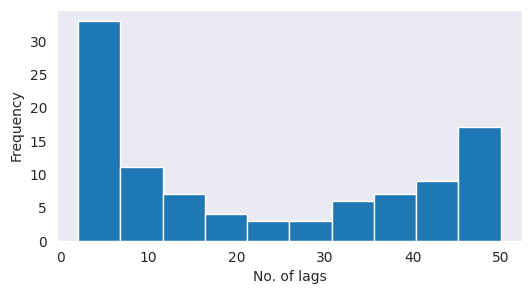

In [14]:
fig, ax = plt.subplots(figsize=(6, 3))
ok_hparams["nlags"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("No. of lags");

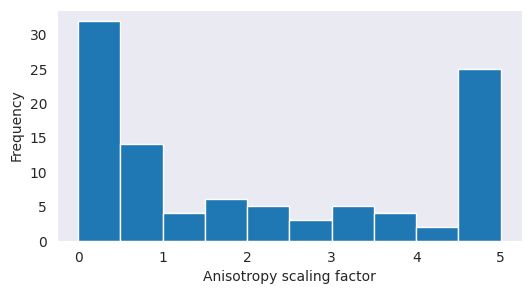

In [15]:
fig, ax = plt.subplots(figsize=(6, 3))
ok_hparams["anisotropy_scaling"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("Anisotropy scaling factor");

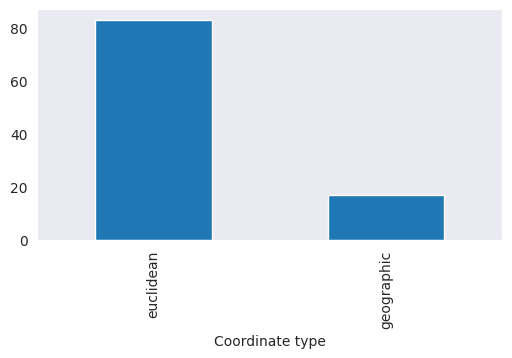

In [16]:
fig, ax = plt.subplots(figsize=(6, 3))
ok_hparams.groupby("coordinates_type").count()["nlags"].plot.bar(ax=ax)
ax.set_xlabel("Coordinate type");

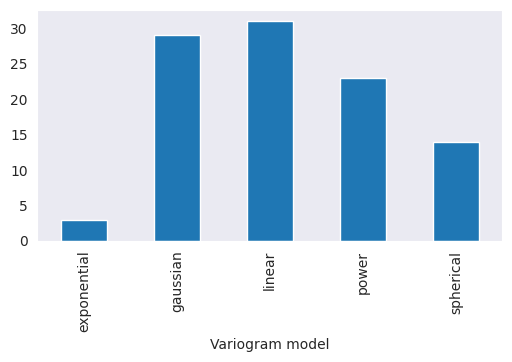

In [17]:
fig, ax = plt.subplots(figsize=(6, 3))
ok_hparams.groupby("variogram_model").count()["nlags"].plot.bar(ax=ax)
ax.set_xlabel("Variogram model");

### 2b. IDW

In [18]:
idw_hparams = pd.read_csv(IDW_RESULTS / "hparams_summary.csv")

In [19]:
idw_hparams = idw_hparams.drop("dataset_id", axis=1)
idw_hparams.head()

,Unnamed: 0,k,power,opt_loss
0,0,7,2.639309,0.399391
1,1,45,3.894711,0.461060
2,2,13,2.347221,0.478380
3,3,14,2.124421,0.323162
4,4,34,2.574446,0.579034


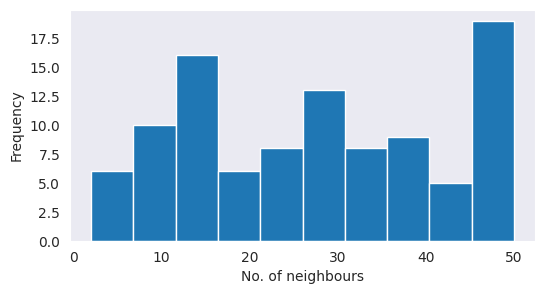

In [20]:
fig, ax = plt.subplots(figsize=(6, 3))
idw_hparams["k"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("No. of neighbours");

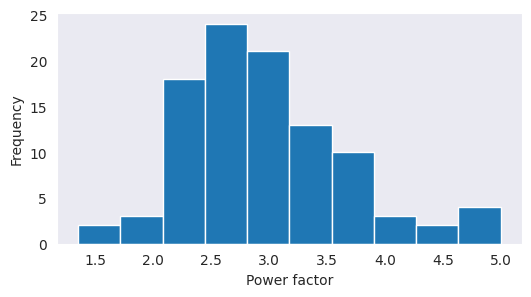

In [22]:
fig, ax = plt.subplots(figsize=(6, 3))
idw_hparams["power"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("Power factor");

### 2c. MMGN

In [23]:
mmgn_hparams = pd.read_csv(MMGN_RESULTS / "hparams_summary.csv")

In [24]:
mmgn_hparams.head()

,dataset_id,lr,weight_decay,batch_size,hidden_dim,latent_dim,n_layers,input_scale,alpha,opt_loss
0,18990407,0.010032,0.036598,284,512,64,6,689,76.387272,0.815870
1,18870704,0.038165,0.000000,1024,64,64,10,1024,100.000000,0.577518
2,19030303,0.013551,0.002622,852,128,256,4,267,94.980599,0.983210
3,19041114,0.010032,0.036598,284,512,64,6,689,76.387272,1.439982
4,18960629,0.013551,0.002622,852,128,256,4,267,94.980599,0.640472


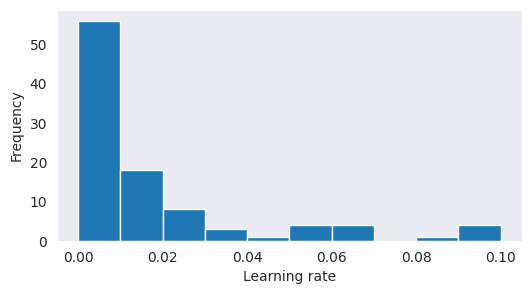

In [25]:
fig, ax = plt.subplots(figsize=(6, 3))
mmgn_hparams["lr"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("Learning rate");

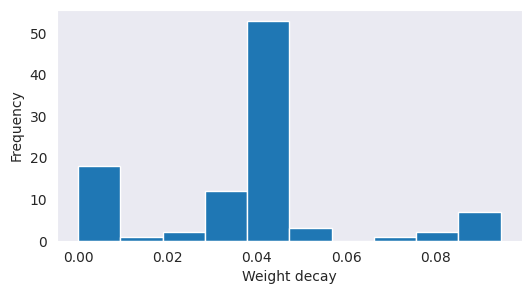

In [26]:
fig, ax = plt.subplots(figsize=(6, 3))
mmgn_hparams["weight_decay"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("Weight decay");

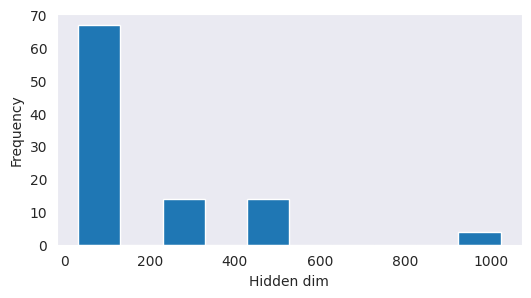

In [27]:
fig, ax = plt.subplots(figsize=(6, 3))
mmgn_hparams["hidden_dim"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("Hidden dim");

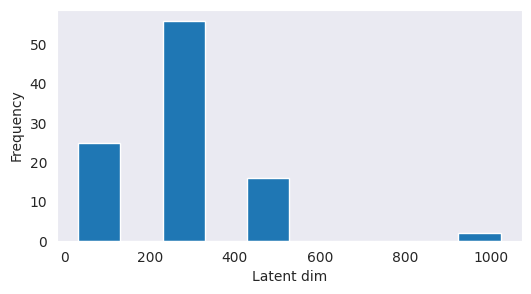

In [28]:
fig, ax = plt.subplots(figsize=(6, 3))
mmgn_hparams["latent_dim"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("Latent dim");

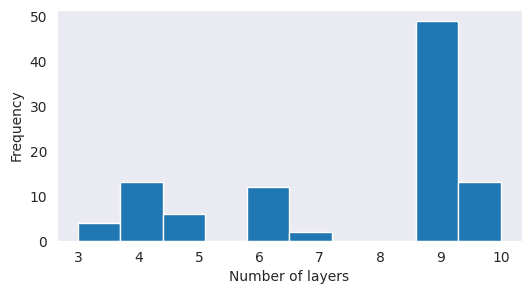

In [29]:
fig, ax = plt.subplots(figsize=(6, 3))
mmgn_hparams["n_layers"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("Number of layers");

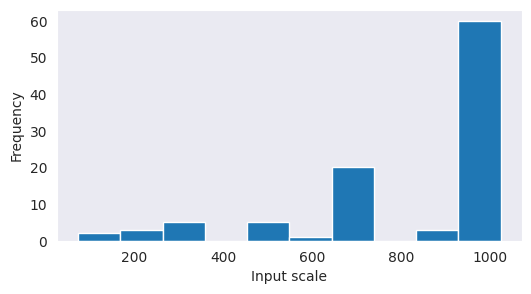

In [30]:
fig, ax = plt.subplots(figsize=(6, 3))
mmgn_hparams["input_scale"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("Input scale");

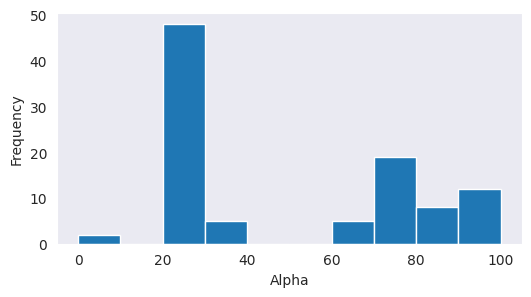

In [42]:
fig, ax = plt.subplots(figsize=(6, 3))
mmgn_hparams["alpha"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("Alpha");

## 3. Summary statistics

In [84]:
def iqr(data):
    return data.quantile(0.75) - data.quantile(0.25)

summary_statistics = pd.DataFrame({
    "IDW": [
        f"{round(all_data["RMSE_idw"].median(), 2):.2f} ({round(all_data["RMSE_idw"].agg(iqr), 2):.2f})",
        f"{round(all_data["MAE_idw"].median(), 2):.2f} ({round(all_data["MAE_idw"].agg(iqr), 2):.2f})",
        f"{round(all_data["R^2_idw"].median(), 2):.2f} ({round(all_data["R^2_idw"].agg(iqr), 2):.2f})",
        f"{round(all_data["Max Abs Error_idw"].median(), 2):.2f} ({round(all_data["Max Abs Error_idw"].agg(iqr), 2):.2f})"
    ],
    "OK": [
        f"{round(all_data["RMSE_ok"].median(), 2):.2f} ({round(all_data["RMSE_ok"].agg(iqr), 2):.2f})",
        f"{round(all_data["MAE_ok"].median(), 2):.2f} ({round(all_data["MAE_ok"].agg(iqr), 2):.2f})",
        f"{round(all_data["R^2_ok"].median(), 2):.2f} ({round(all_data["R^2_ok"].agg(iqr), 2):.2f})",
        f"{round(all_data["Max Abs Error_ok"].median(), 2):.2f} ({round(all_data["Max Abs Error_ok"].agg(iqr), 2):.2f})"
    ],
    "MMGN": [
        f"{round(all_data["RMSE_mmgn"].median(), 2):.2f} ({round(all_data["RMSE_mmgn"].agg(iqr), 2):.2f})",
        f"{round(all_data["MAE_mmgn"].median(), 2):.2f} ({round(all_data["MAE_mmgn"].agg(iqr), 2):.2f})",
        f"{round(all_data["R^2_mmgn"].median(), 2):.2f} ({round(all_data["R^2_mmgn"].agg(iqr), 2):.2f})",
        f"{round(all_data["Max Abs Error_mmgn"].median(), 2):.2f} ({round(all_data["Max Abs Error_mmgn"].agg(iqr), 2):.2f})"
    ]       
}, index=["RMSE", "MAE", "R^2", "Delta max"])
summary_statistics

,IDW,OK,MMGN
RMSE,3.00 (1.93),5.40 (3.30),4.11 (2.51)
MAE,1.31 (0.77),3.81 (2.33),1.94 (1.02)
R^2,0.67 (0.16),-0.76 (1.92),0.46 (0.21)
Delta max,24.06 (17.15),24.85 (17.40),35.92 (21.53)


## 4. Statistical analysis

### 4a. Omnibus test

We carry out Kruskal-Wallis non-parametric test as quality measures do now follow normal distribution.

In [36]:
from scipy.stats import kruskal

KRUSKAL_ALPHA = 0.05

In [40]:
h_rmse, p_rmse = kruskal(all_data['RMSE_idw'], all_data['RMSE_ok'], all_data['RMSE_mmgn'])
if p_rmse < KRUSKAL_ALPHA:
    print(f"There is statistically significant difference between RMSEs as p-value={p_rmse}")
else:
    print(f"There is **no** statistically significant difference between RMSEs as p-value={p_rmse}")

There is statistically significant difference between RMSEs as p-value=1.8997823800321521e-16


In [41]:
rmse_effect_size = h_rmse / (len(all_data) - 1)
print(f"The effect size for RMSE is {rmse_effect_size}")

The effect size for RMSE is 0.7387677988799461


In [ ]:
sinet_hparams = pd.read_csv(SINET_RESULTS / "hparams_summary.csv")

In [ ]:
sinet_hparams.head()

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3))
sinet_hparams["lr"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("Learning rate");

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3))
sinet_hparams["weight_decay"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("Weight decay");

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3))
sinet_hparams["scale"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("Scale");

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3))
sinet_hparams["num_epochs"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("No. of epochs");

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3))
sinet_hparams["batch_size"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("Batch size");

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3))
sinet_hparams["hidden_dim"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("Hidden dim");

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3))
sinet_hparams["mse_loss_weight"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("MSE loss weight");

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3))
sinet_hparams["eikonal_loss_weight"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("Eikonal loss weight");

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3))
sinet_hparams["laplace_loss_weight"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("Laplace loss weight");